### Treść zadania

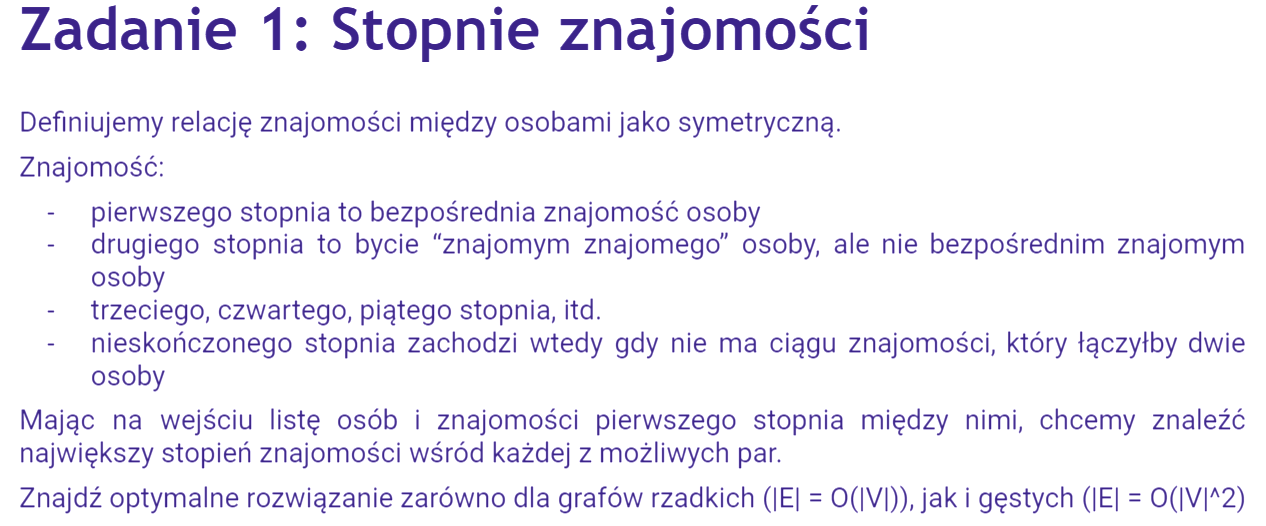

### Ogólne omówienie problemu

Na wejściu otrzymujemy listę par osób które się bezpośrednio znają (znajomość pierwszego stopnia). Ponieważ znajomość jest relacją symetryczną, utworzony graf będzie grafem nieskierowanym, w którym wierzchołki będą oznaczać osoby, a krwawędzie znajmości pierwszego stopnia między parami osób. Krawędzie są krawędziami nieważonymi, ponieważ bezpośrednie połączenie dwóch osób oznacza znajomość pierwszego stopnia (długość ścieżki jest równa 1), a więc dla dowolnej pary osób (wierzchołków) $ u $ i $ v $, stopień znajomości między tą parą osób jest po prostu równy długości najkrótszej ścieżki, która łączy te osoby, czyli liczbie krawędzi między daną parą osób, które wchodzą w skład najkrótszej ścieżki, łączącej wierzchołki, odpowiadającej danym osobom. Ponieważ szukamy największego stopnia znajomości, tak naprawdę nasz problem sprowadza się do znalezienia najdłuższej spośród najkrótszych ścieżek między każdą parą wierzchołków (wynika to stąd, że stopień znajomości to długość najkrótszej ścieżki między parą wierzchołków, co opisałem wyżej, a my chcemy znaleźć największy stopień znajomości, więc maksymalizujemy to minimum).

# 1) Dla grafów rzadkich

### Omówienie algorytmu

Ponieważ w grafie rzadkim $ E = O(V) $, a my szukamy najkrótszych ścieżek w grafie nieważonym, najlepszym sposobem jest odpalenie algorytmu BFS z każdego kolejnego wierzchołka i wyznaczenie długości najkrótszych ścieżek do każdego innego wierzchołka, czyli stopni znajomości dla pewnej osoby, której odpowiada wierzchołek $ u $ z każdą inną osobą. Po każdym takim wywołaniu zapamiętujemy maksimum i aktualizujemy globalnie największą wartość, która na koniec będzie szukanym stopniem znajomości.
###### UWAGA
Ponieważ w żadnym miejscu nie jest powiedziane, że graf musi być spójny, czyli, że każda osoba zna jakąś inną (pośrednio lub bezpośrednio), w przypadku, gdy graf nie jest spójny, rozwiązaniem jest $ \infty $, ponieważ wtedy istnieje taka para osób, dla której nie istnieje ciąg znajomości, który łączy obie osoby z tej pary.

### Złożoność

###### Obliczeniowa:
$ O(V \cdot (V + E)) = | E = O(V) | = O(V \cdot (2V)) = O(V^2) $  - nic lepszego nie osiągniemy, bo pytamy o największy stopień znajomości wśród każdej z możliwych par, a par takich jest $ O(V^2) $, więc nawet gdybyśmy mieli dane stopnie znajomości, to i tak sprawdzenie ich wszystkich zajęłoby nam $ O(V^2) $ czasu. 
###### Pamięciowa:
$ O(V) $

### Implementacja

In [6]:
from queue import Queue


def create_graph(E):
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1

    G = [[] for _ in range(n)]
    for u, v in E:
        G[u].append(v)
        G[v].append(u)
    return G


def is_connected(G):
    n = len(G)
    visited = [False] * n
    count = 0
    
    def dfs(u):
        nonlocal count
        count += 1
        visited[u] = True
        for v in G[u]:
            if not visited[v]:
                dfs(v)
                
    dfs(0)
    return count == n


def max_length_shortest_path(G):
    if not is_connected(G): return float('inf')
    n = len(G)
    dist = [0] * n
    visited = [0] * n
    token = 1
    
    def bfs(u):
        q = Queue()
        q.put(u)
        visited[u] = token
        dist[u] = 0
        max_dist = 0
        
        while not q.empty():
            u = q.get()
            for v in G[u]:
                if visited[v] != token:
                    dist[v] = dist[u] + 1
                    if dist[v] > max_dist:
                        max_dist = dist[v]
                    visited[v] = token
                    q.put(v)
                    
        return max_dist
    
    result = 0
    for u in range(n):
        result = max(result, bfs(u))
        token += 1
        
    return result


def acquaintance_degree(P: 'array of first degree acquaintance people pairs'):
    G = create_graph(P)
    return max_length_shortest_path(G)

###### Kilka testów

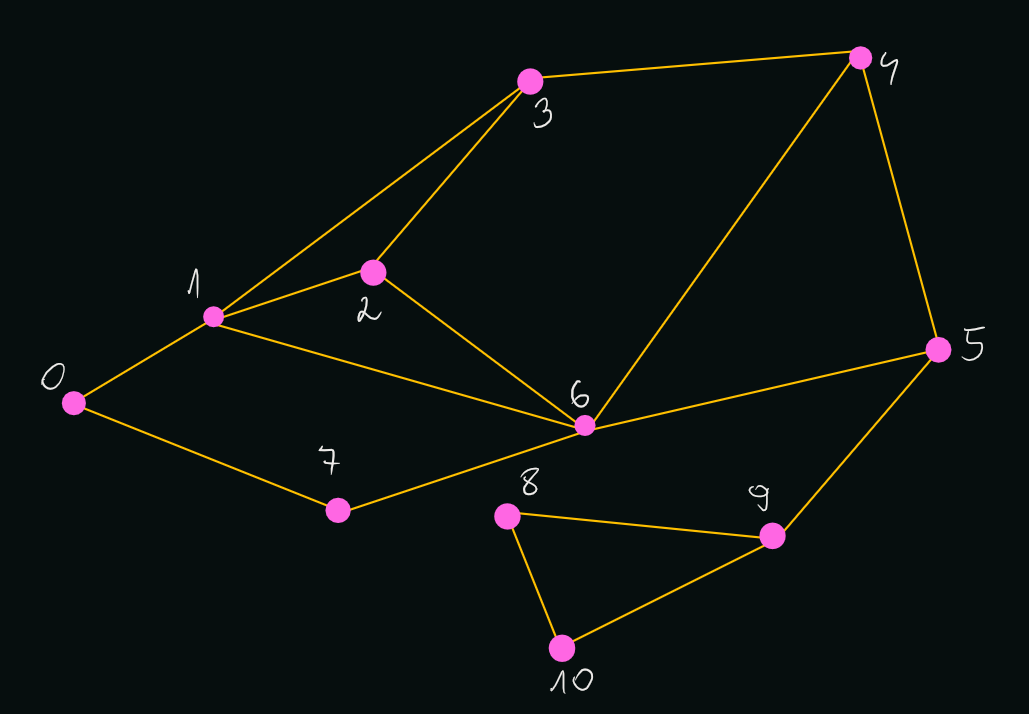

In [7]:
P = [(0, 1), (1, 2), (1, 6), (1, 3), (2, 3), (2, 6), (0, 7), (7, 6), (3, 4), (6, 4), (4, 5), (6, 5),
     (5, 9), (8, 9), (8, 10), (9, 10)]

print(acquaintance_degree(P))

5


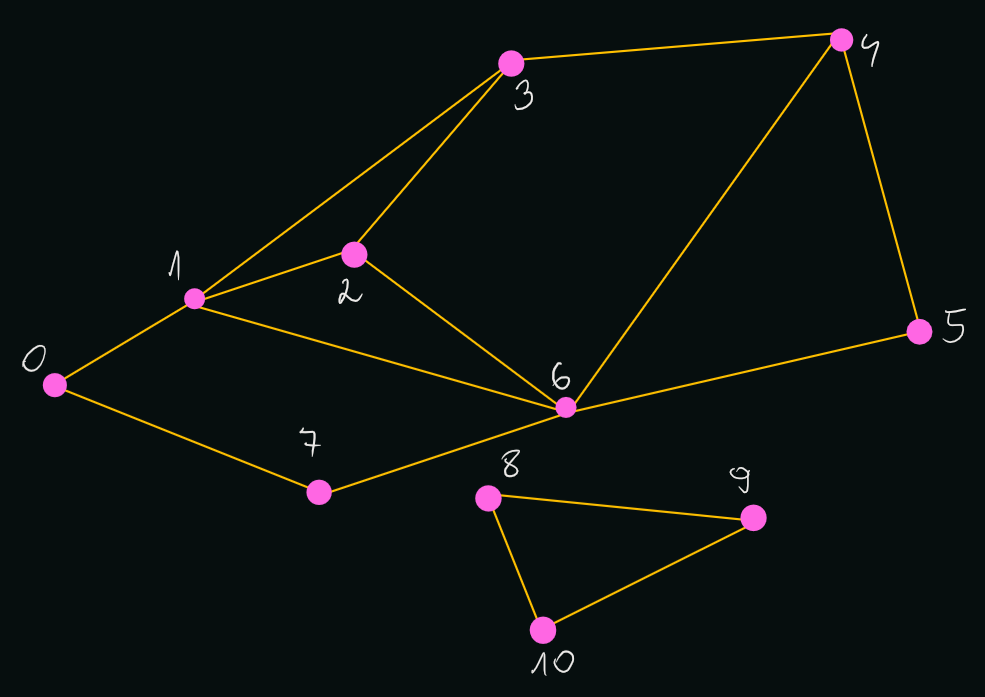

In [8]:
P = [(0, 1), (1, 2), (1, 6), (1, 3), (2, 3), (2, 6), (0, 7), (7, 6), (3, 4), (6, 4), (4, 5), (6, 5),
     (8, 9), (8, 10), (9, 10)]

print(acquaintance_degree(P))

inf


### (Dodatkowo) Zwracanie wszystkich par osób o największym stopniu znajomości

In [9]:
from queue import Queue


def create_graph(E):
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1

    G = [[] for _ in range(n)]
    for u, v in E:
        G[u].append(v)
        G[v].append(u)
    return G


def is_connected(G):
    n = len(G)
    visited = [False] * n
    count = 0
    
    def dfs(u):
        nonlocal count
        count += 1
        visited[u] = True
        for v in G[u]:
            if not visited[v]:
                dfs(v)
                
    dfs(0)
    return count == n


def max_length_shortest_paths(G):
    if not is_connected(G): return float('inf'), []
    n = len(G)
    dist = [0] * n
    visited = [0] * n
    token = 1
    
    def bfs(u):
        q = Queue()
        q.put(u)
        visited[u] = token
        dist[u] = 0
        max_dist = 0
        max_acq = []
        
        while not q.empty():
            u = q.get()
            for v in G[u]:
                if visited[v] != token:
                    dist[v] = dist[u] + 1
                    if dist[v] > max_dist:
                        max_dist = dist[v]
                        max_acq = [v]
                    elif dist[v] == max_dist:
                        max_acq.append(v)
                    visited[v] = token
                    q.put(v)
                    
        return max_dist, max_acq
    
    temp = []
    max_length = 0
    for u in range(n):
        curr_length, max_acq = bfs(u)
        if curr_length > max_length:
            max_length = curr_length
            temp = [(u, max_acq)]
        elif curr_length == max_length:
            # Append an array of pairs as it is O(1) and we don't have to add
            # each element separately while extending and array. This is a little
            # performance imprevement because we might find another max_length and
            # then replace the whole result array by a new one so our all previous
            # operations would be useless
            temp.append((u, max_acq))
        token += 1
        
    # Megre all arrays of paths into one array
    result = []
    for u, acq in temp:
        for v in acq:
            # Filter out repetitions
            if u < v: result.append((u, v))
    
    return max_length, result


def max_acquaintance_degree_pairs(P: 'array of first degree acquaintance people pairs'):
    G = create_graph(P)
    return max_length_shortest_paths(G)

###### Kilka testów

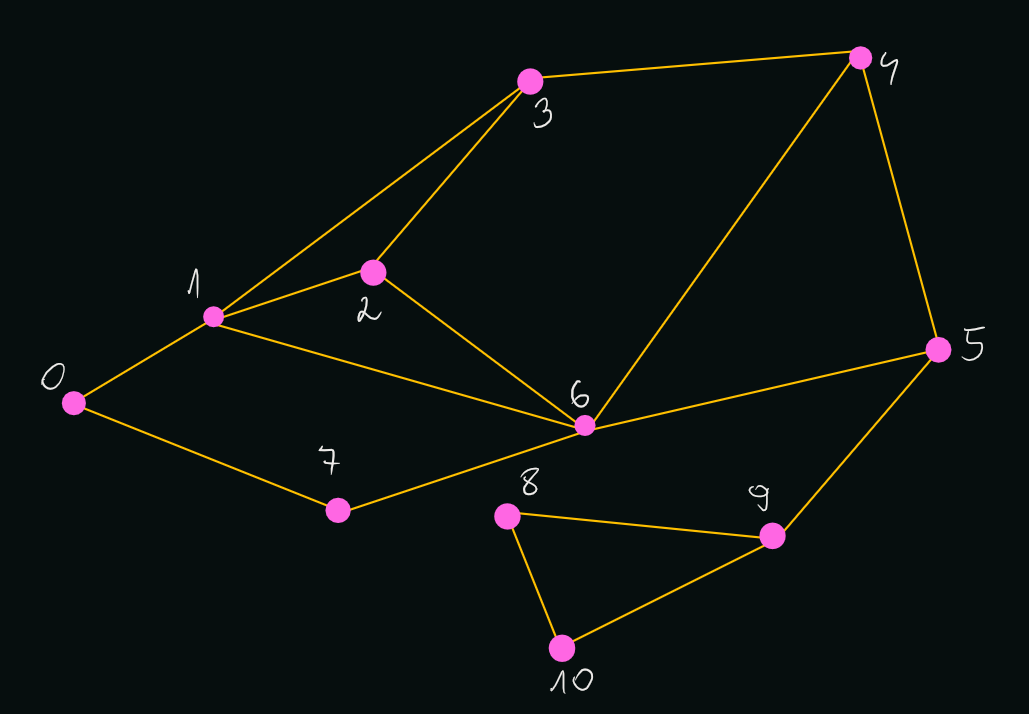

In [10]:
P = [(0, 1), (1, 2), (1, 6), (1, 3), (2, 3), (2, 6), (0, 7), (7, 6), (3, 4), (6, 4), (4, 5), (6, 5),
     (5, 9), (8, 9), (8, 10), (9, 10)]

print(max_acquaintance_degree_pairs(P))

(5, [(0, 8), (0, 10)])


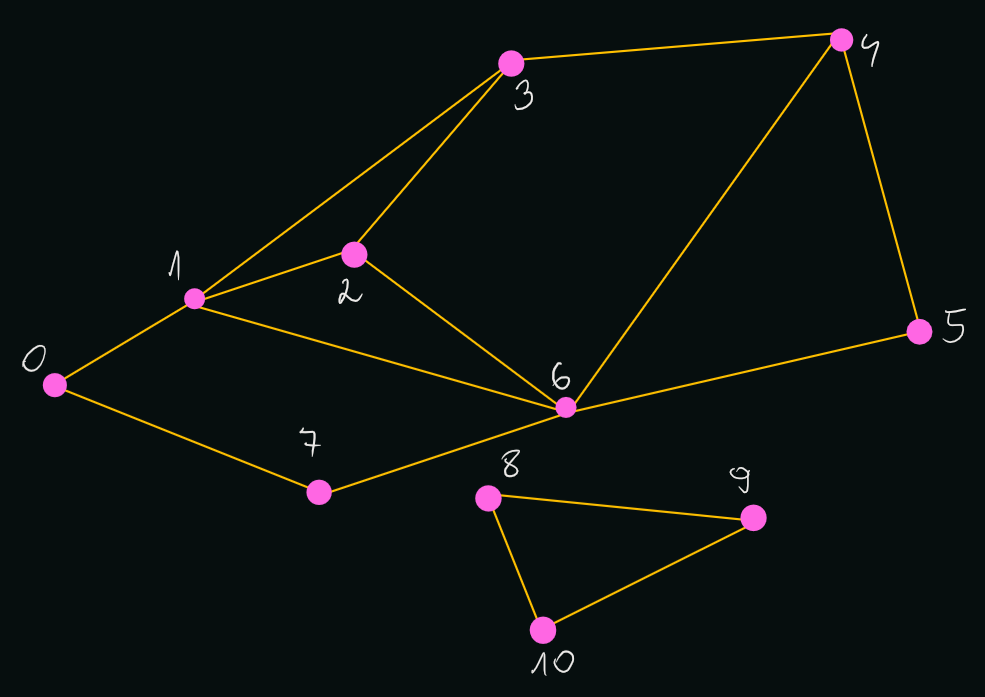

In [11]:
P = [(0, 1), (1, 2), (1, 6), (1, 3), (2, 3), (2, 6), (0, 7), (7, 6), (3, 4), (6, 4), (4, 5), (6, 5),
     (8, 9), (8, 10), (9, 10)]

print(max_acquaintance_degree_pairs(P))

(inf, [])


# 2) Dla grafów gęstych

### Omówienie algorytmu

W tym przypadku możemy postąpić ponownie w sposób podobny do powyższego, czyli zastosować algorytm BFS do wyznaczania najkrótszych ścieżek i uzyskamy złożoność $ O(V \cdot (V + E)) = | E = O(V^2) | = O(V \cdot (V + V^2)) = O(V^3) $. Da się jednak rozwiącać ten problem nieco lepiej (łatwiej), choć złożoność pozostanie taka sama. Wystarczy użyć algorytmu Floyda-Warshalla i potraktować wagę każdej krawędzi jako $ 1 $. Ponieważ wówczas konieczne jest przekazanie na wejściu grafu w postaci macierzowej, istnienie krawędzi będziemy oznaczali jako $ 1 $, a jej brak jako $ 0 $. Początkowo inicjalizujemy macierz kwadratową długości najkrótszych ścieżek między parami wierzchołków wartościami $ \infty $ poza elementami, które leżą na przekątnej, ponieważ odległość od wierzchołka do samego siebie wynosi $ 0 $. Od razu również dodajemy jedynki w tych miejcach macierzy, które odpowiadają krawędziom z grafu. Po wywołaniu algorytmu Floyda-Warshalla (bez badania ujemnych cykli, bo takich nie będzie), przechodzimy po macierzy długości najkrótszych ścieżek i zapamiętujemy największą wartość, którą zwrócimy.

### Złożoność

###### Obliczeniowa:
$ O(V^3) $ - bo używamy Floyda-Warshalla
###### Pamięciowa:
$ O(V^2) $ - bo używamy Floyda-Warshalla

### Implementacja

In [12]:
def create_graph(E):
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1

    G = [[0] * n for _ in range(n)]
    for u, v in E:
        G[u][v] = G[v][u] = 1
    return G


def floyd_warshall(G: 'undirected graph matrix'):
    n = len(G)
    inf = float('inf')
    
    W = [[inf] * n for _ in range(n)]
    
    for i in range(n):
        W[i][i] = 0
        for j in range(i + 1, n):
            if G[i][j]: 
                W[i][j] = W[j][i] = G[i][j]
            
    for t in range(n):
        for i in range(n):
            for j in range(n):
                if W[i][t] + W[t][j] < W[i][j]:
                    W[i][j] = W[i][t] + W[t][j]
                
    return W


def acquaintance_degree(P: 'array of first degree acquaintance people pairs'):
    G = create_graph(P)
    W = floyd_warshall(G)
    inf = float('inf')
    n = len(G)
    
    result = 0
    for i in range(n):
        for j in range(n):
            if W[i][j] > result:
                result = W[i][j]
                if result == inf:
                    break
    return result

###### Kilka testów

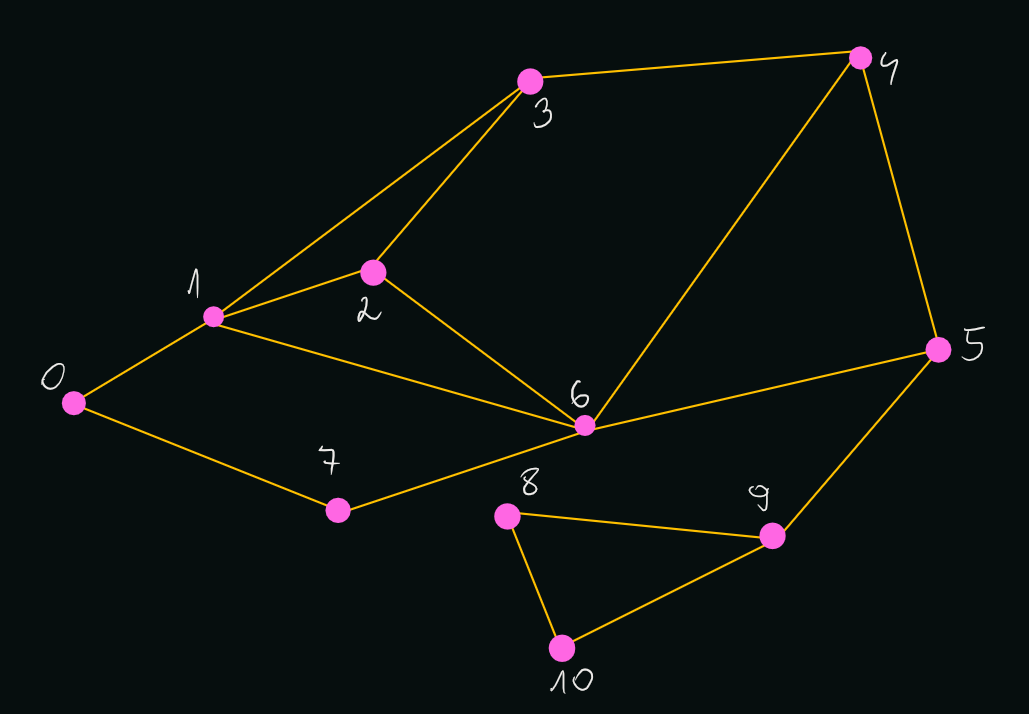

In [13]:
P = [(0, 1), (1, 2), (1, 6), (1, 3), (2, 3), (2, 6), (0, 7), (7, 6), (3, 4), (6, 4), (4, 5), (6, 5),
     (5, 9), (8, 9), (8, 10), (9, 10)]

print(acquaintance_degree(P))

5


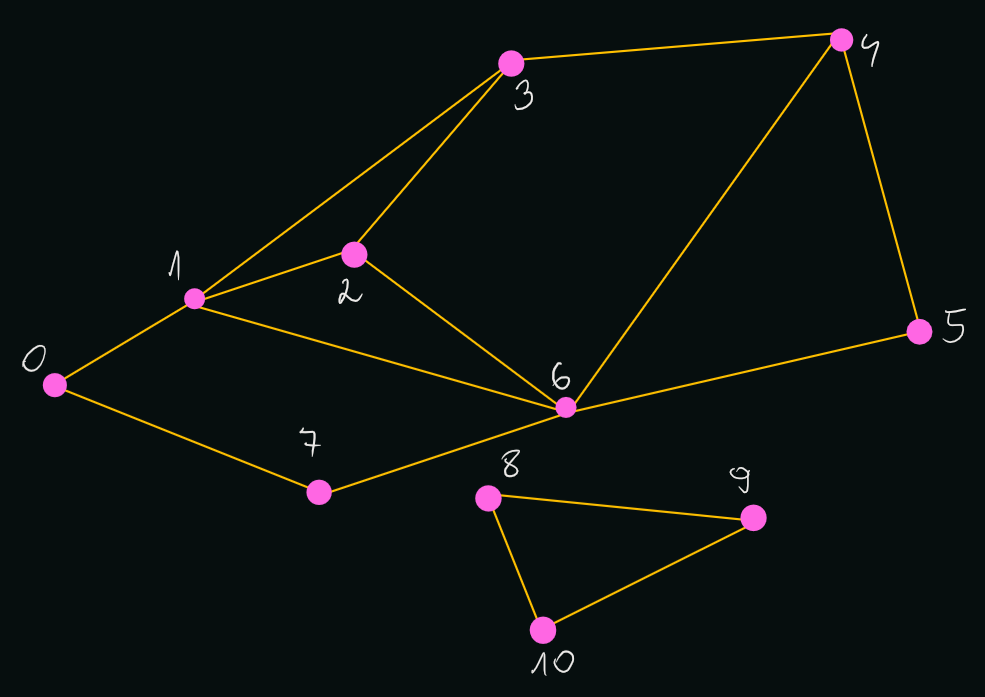

In [14]:
P = [(0, 1), (1, 2), (1, 6), (1, 3), (2, 3), (2, 6), (0, 7), (7, 6), (3, 4), (6, 4), (4, 5), (6, 5),
     (8, 9), (8, 10), (9, 10)]

print(acquaintance_degree(P))

inf


### (Dodatkowo) Zwracanie wszystkich par osób o największym stopniu znajomości

In [15]:
def create_graph(E):
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1

    G = [[0] * n for _ in range(n)]
    for u, v in E:
        G[u][v] = G[v][u] = 1
    return G


def floyd_warshall(G: 'undirected graph matrix'):
    n = len(G)
    inf = float('inf')
    
    W = [[inf] * n for _ in range(n)]
    
    for i in range(n):
        W[i][i] = 0
        for j in range(i + 1, n):
            if G[i][j]: 
                W[i][j] = W[j][i] = G[i][j]
            
    for t in range(n):
        for i in range(n):
            for j in range(n):
                if W[i][t] + W[t][j] < W[i][j]:
                    W[i][j] = W[i][t] + W[t][j]
                
    return W


def max_acquaintance_degree_pairs(P: 'array of first degree acquaintance people pairs'):
    G = create_graph(P)
    W = floyd_warshall(G)
    inf = float('inf')
    n = len(G)
    
    deg = 0
    pairs = []
    for i in range(n):
        for j in range(n):
            if W[i][j] > deg:
                deg = W[i][j]
                if i < j: pairs = [(i, j)]
                if deg == inf:
                    return inf, []
            elif W[i][j] == deg:
                 if i < j: pairs.append((i, j))
                    
    return deg, pairs

###### Kilka testów

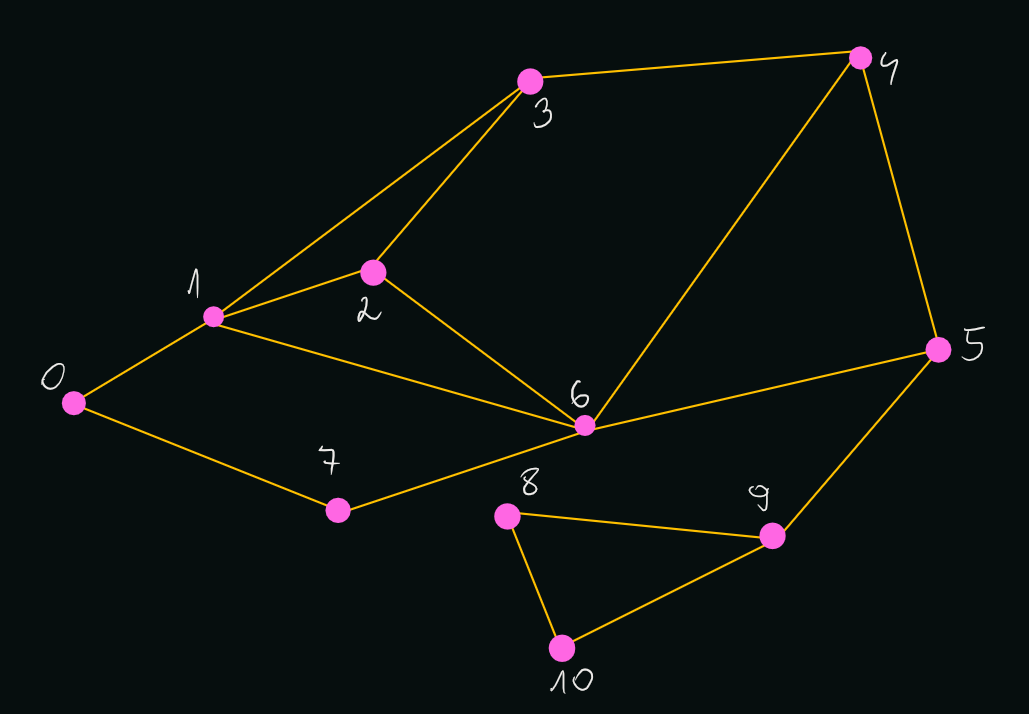

In [16]:
P = [(0, 1), (1, 2), (1, 6), (1, 3), (2, 3), (2, 6), (0, 7), (7, 6), (3, 4), (6, 4), (4, 5), (6, 5),
     (5, 9), (8, 9), (8, 10), (9, 10)]

print(max_acquaintance_degree_pairs(P))

(5, [(0, 8), (0, 10)])


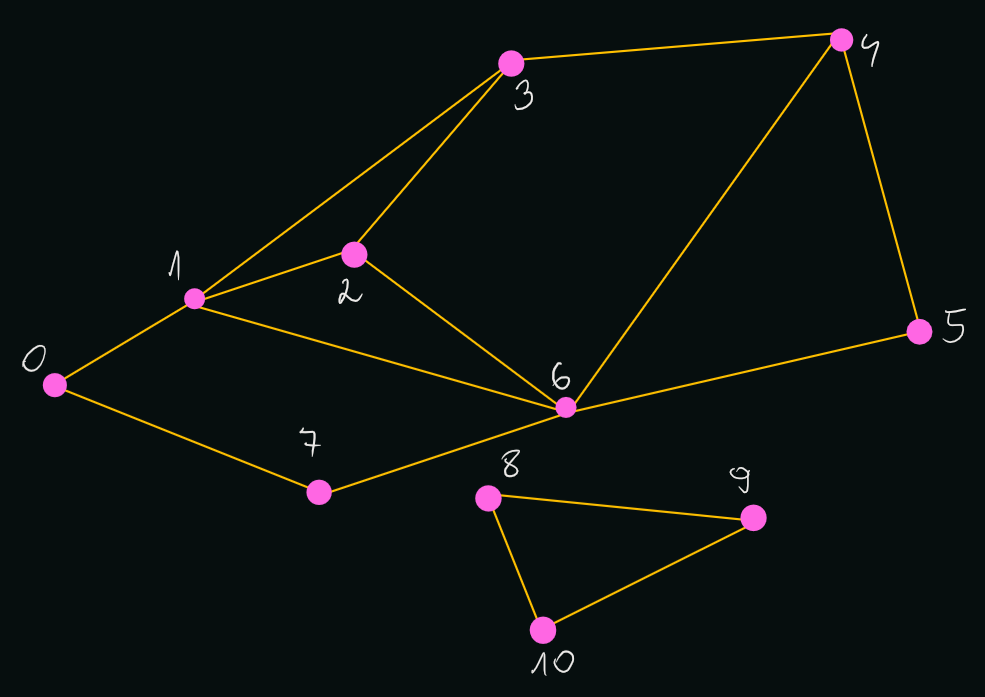

In [17]:
P = [(0, 1), (1, 2), (1, 6), (1, 3), (2, 3), (2, 6), (0, 7), (7, 6), (3, 4), (6, 4), (4, 5), (6, 5),
     (8, 9), (8, 10), (9, 10)]

print(max_acquaintance_degree_pairs(P))

(inf, [])
